In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import wrf
from wrf_parallel import get_storm_motion, get_mean_var_hgt
from era5_read import read_era5
import datetime as dt
import metpy.units as units
import metpy.calc as mpcalc
import glob
import pandas as pd

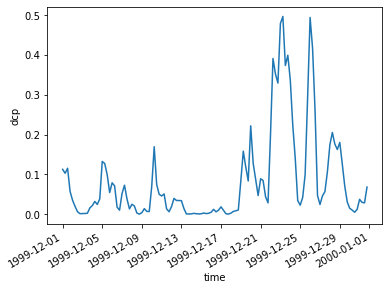

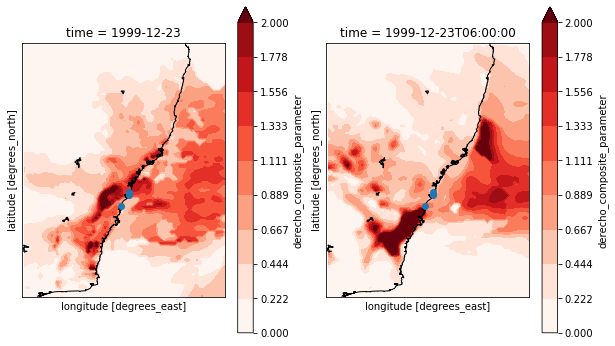

In [54]:
#For december 1999, look at the conective environment, and find a day supportive of supercell/derecho development.
#This is the month with BARPA-SY trial data. Use this trial data to identify simulated cells.

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28              #Max
#lon1 = 151; lat1 = -34.2; lon2 = 151.6; lat2 = -33.6
barpa_r_env = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19991201_19991231.nc").sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2)})
barpa_r_env["dcp"].mean(("lat","lon")).plot()
df=pd.DataFrame({"dcp":barpa_r_env["dcp"].mean(("lat","lon")).values}, index=barpa_r_env.time.values)

plt.figure(figsize=[10,6])
m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,projection="cyl",resolution="h")
plt.subplot(1,2,1);xr.plot.contourf(barpa_r_env["dcp"].sel({"time":"1999-12-23 00:00"}),cmap=plt.get_cmap("Reds"), levels=np.linspace(0,2,10), extend="max")
m.drawcoastlines()
m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
plt.subplot(1,2,2);xr.plot.contourf(barpa_r_env["dcp"].sel({"time":"1999-12-23 06:00"}),cmap=plt.get_cmap("Reds"), levels=np.linspace(0,2,10), extend="max")
m.drawcoastlines()
m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")

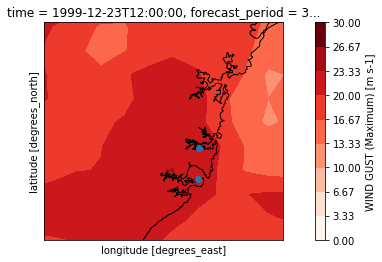

In [96]:
lon1 = 150.50; lat1 = -34.29; lon2 = 151.60; lat2 = -33.29 
stride=3
for t in np.arange(20,60):
    print(t)
    m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,projection="cyl",resolution="h")
    barpa_sy_u = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_1p5km/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp27/wnd_ucmp-pp27-BARPA-SY_1p5km-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t}).sel({"model_level_number":10,})["wnd_ucmp"].sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})
    barpa_sy_v = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_1p5km/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp27/wnd_vcmp-pp27-BARPA-SY_1p5km-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t}).sel({"model_level_number":10})["wnd_vcmp"].interp({"longitude":barpa_sy_u.longitude, "latitude":barpa_sy_u.latitude})
    barpa_sy_wg = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_1p5km/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_1p5km-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t})["wndgust10m"].sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})
    x,y = np.meshgrid(barpa_sy_u.longitude, barpa_sy_v.latitude)
    u=np.squeeze(barpa_sy_u.values)
    v=np.squeeze(barpa_sy_v.values)
    u = u[0:u.shape[0]:stride, 0:u.shape[1]:stride]
    v = v[0:v.shape[0]:stride, 0:v.shape[1]:stride]
    x = x[0:x.shape[0]:stride, 0:x.shape[1]:stride]
    y = y[0:y.shape[0]:stride, 0:y.shape[1]:stride]        
    x1,y1 = np.meshgrid(barpa_sy_wg.longitude, barpa_sy_wg.latitude)
    plt.contourf(x1, y1, np.squeeze(barpa_sy_wg.values), cmap=plt.get_cmap("Reds"), levels=np.linspace(0,30,10), extend="max"); plt.colorbar()
    plt.quiver(x,y,u,v)
    plt.title(barpa_sy_wg.time.values)
    m.drawcoastlines()
    m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
    m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
    m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
    plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/barpa_sy/"+str(t)+".png", bbox_inches="tight")
    plt.close()

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [3]:
lon1 = 150.50; lat1 = -34.29; lon2 = 151.60; lat2 = -33.29 
stride=3
for t in np.arange(20,60):
    print(t)
    m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,projection="cyl",resolution="h")
    barpa_sy_u = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_km2p2/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp27/wnd_ucmp-pp27-BARPA-SY_km2p2-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t}).sel({"model_level_number":10,})["wnd_ucmp"].sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})
    barpa_sy_v = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_km2p2/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp27/wnd_vcmp-pp27-BARPA-SY_km2p2-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t}).sel({"model_level_number":10})["wnd_vcmp"].interp({"longitude":barpa_sy_u.longitude, "latitude":barpa_sy_u.latitude})
    barpa_sy_wg = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-SY_km2p2/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_km2p2-19991220T0000Z-19991223T0000Z.nc").isel({ "time":t})["wndgust10m"].sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2)})
    x,y = np.meshgrid(barpa_sy_u.longitude, barpa_sy_v.latitude)
    u=np.squeeze(barpa_sy_u.values)
    v=np.squeeze(barpa_sy_v.values)
    u = u[0:u.shape[0]:stride, 0:u.shape[1]:stride]
    v = v[0:v.shape[0]:stride, 0:v.shape[1]:stride]
    x = x[0:x.shape[0]:stride, 0:x.shape[1]:stride]
    y = y[0:y.shape[0]:stride, 0:y.shape[1]:stride]        
    x1,y1 = np.meshgrid(barpa_sy_wg.longitude, barpa_sy_wg.latitude)
    plt.contourf(x1, y1, np.squeeze(barpa_sy_wg.values), cmap=plt.get_cmap("Reds"), levels=np.linspace(0,30,10), extend="max"); plt.colorbar()
    plt.quiver(x,y,u,v)
    plt.title(barpa_sy_wg.time.values)
    m.drawcoastlines()
    m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
    m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
    m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
    plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/barpa_sy/km2p2_"+str(t)+".png", bbox_inches="tight")
    plt.close()

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


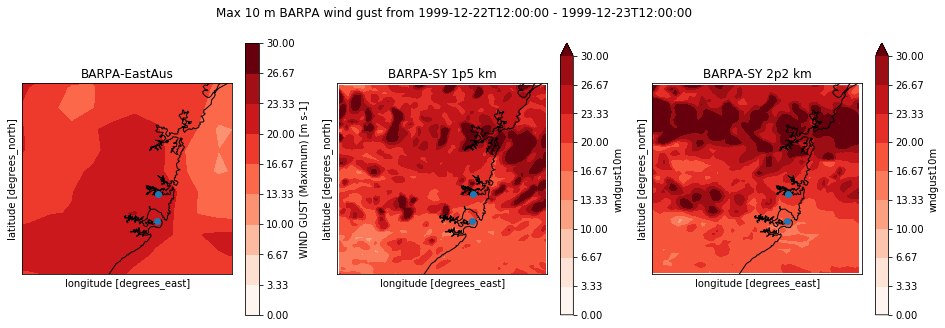

In [13]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
lon1 = 150.50; lat1 = -34.29; lon2 = 151.60; lat2 = -33.29 
m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,projection="cyl",resolution="h")
barpa_r_wg = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/cmip5/ACCESS1-0/r1i1p1/19890901T0000Z/19991218T0000Z/pp0/max_wndgust10m-pp0-BARPA-EASTAUS_12km-19991218T0000Z.nc")["max_wndgust10m"].sel({"latitude":slice(lat1-0.5, lat2+0.5), "longitude":slice(lon1-0.5,lon2+0.5), "time":"1999-12-23 12:00"})
xr.plot.contourf(barpa_r_wg, levels=np.linspace(0,30,10), cmap=plt.get_cmap("Reds"))
m.drawcoastlines()
m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
plt.title("BARPA-EastAus")

plt.subplot(1,3,2)
files = ["/g/data/du7/barpa/trials/BARPA-SY_1p5km/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_1p5km-19991220T0000Z-19991222T0000Z.nc",\
        "/g/data/du7/barpa/trials/BARPA-SY_1p5km/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_1p5km-19991220T0000Z-19991223T0000Z.nc"]
xr.plot.contourf(\
                 xr.open_mfdataset(files, concat_dim="time", combine="nested")["wndgust10m"]\
                 .sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2), "time":slice("1999-12-22 12:00","1999-12-23 12:00")}).max("time"),\
            cmap=plt.get_cmap("Reds"), levels=np.linspace(0,30,10))
m.drawcoastlines()
m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
plt.title("BARPA-SY 1p5 km")

plt.subplot(1,3,3)
files = ["/g/data/du7/barpa/trials/BARPA-SY_km2p2/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_km2p2-19991220T0000Z-19991222T0000Z.nc",\
        "/g/data/du7/barpa/trials/BARPA-SY_km2p2/cmip5/ACCESS1-0/r1i1p1/19991210T0000Z/19991220T0000Z/pp26/wndgust10m-pp26-BARPA-SY_km2p2-19991220T0000Z-19991223T0000Z.nc"]
xr.plot.contourf(\
                 xr.open_mfdataset(files, concat_dim="time", combine="nested")["wndgust10m"]\
                 .sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2), "time":slice("1999-12-22 12:00","1999-12-23 12:00")}).max("time"),\
            cmap=plt.get_cmap("Reds"), levels=np.linspace(0,30,10))
m.drawcoastlines()
m.plot([151.2069] , [-34.0116], linestyle="none", marker="o", color="tab:blue")
m.plot([150.8931] , [-34.4278], linestyle="none", marker="o", color="tab:blue")
m.plot([151.2093] , [-33.8688], linestyle="none", marker="o", color="tab:blue")
plt.title("BARPA-SY 2p2 km")

plt.suptitle("Max 10 m BARPA wind gust from 1999-12-22T12:00:00 - 1999-12-23T12:00:00")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/barpa_sy_19991223.png", bbx_inches="tight")

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


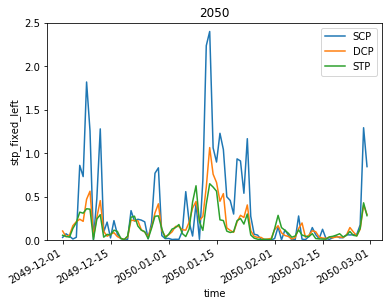

In [28]:

#SYDNEY

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28              
files = ["/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_20491201_20491231.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_20500101_20500131.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_20500201_20500228.nc"]
barpa_env = xr.open_mfdataset(files).sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2)})
barpa_env["scp"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="SCP")
barpa_env["dcp"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="DCP")
barpa_env["stp_fixed_left"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="STP")
plt.legend()
plt.title("2050")
plt.ylim([0,2.5])
plt.savefig("/g/data/eg3/ab4502/figs/barpa_2050_daily_ts.png", bbox_inches="tight")

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


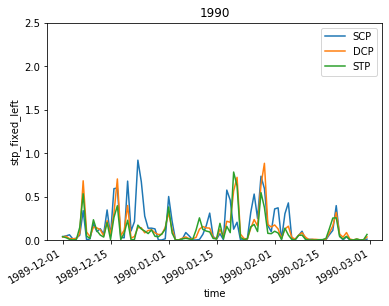

In [29]:

#Sydney

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28   
files = ["/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19891201_19891231.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19900101_19900131.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19900201_19900228.nc"]
barpa_env = xr.open_mfdataset(files).sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2)})
barpa_env["scp"].resample({"time":"1D"}).max("time").mean(("lat" ,"lon")).plot(label="SCP")
barpa_env["dcp"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="DCP")
barpa_env["stp_fixed_left"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="STP")
plt.legend()
plt.ylim([0,2.5])
plt.title("1990")
plt.savefig("/g/data/eg3/ab4502/figs/barpa_1990_daily_ts.png", bbox_inches="tight")

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


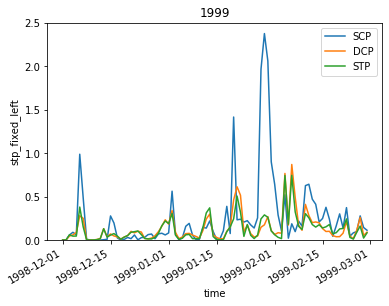

In [30]:

#Sydney

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28   
files = ["/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19981201_19981231.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19990101_19990131.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19990201_19990228.nc"]
barpa_env = xr.open_mfdataset(files).sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2)})
barpa_env["scp"].resample({"time":"1D"}).max("time").mean(("lat" ,"lon")).plot(label="SCP")
barpa_env["dcp"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="DCP")
barpa_env["stp_fixed_left"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="STP")
plt.legend()
plt.ylim([0,2.5])
plt.title("1999")
plt.savefig("/g/data/eg3/ab4502/figs/barpa_1999_daily_ts.png", bbox_inches="tight")

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


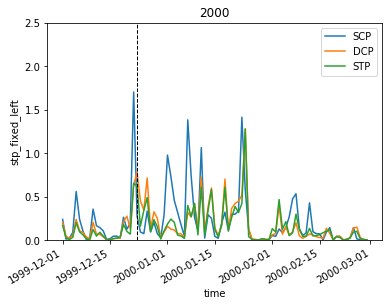

In [39]:

#Sydney

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28   
files = ["/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_19991201_19991231.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_20000101_20000131.nc",\
        "/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpa_access_20000201_20000229.nc"]
barpa_env = xr.open_mfdataset(files).sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2)})
barpa_env["scp"].resample({"time":"1D"}).max("time").mean(("lat" ,"lon")).plot(label="SCP")
barpa_env["dcp"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="DCP")
barpa_env["stp_fixed_left"].resample({"time":"1D"}).max("time").mean(("lat","lon")).plot(label="STP")
plt.legend()
plt.ylim([0,2.5])
plt.title("2000")
plt.axvline("1999-12-23 00:00", lw=1, color="k", ls="--")
plt.savefig("/g/data/eg3/ab4502/figs/barpa_2000_daily_ts.png", bbox_inches="tight")

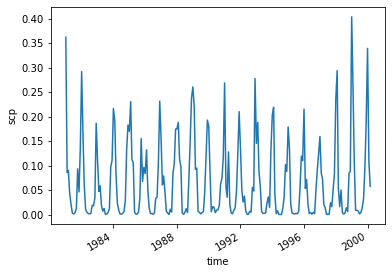

In [40]:

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28   
f = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_scp_6hr_daily_max_mean.nc")
f.sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2), "time":slice("1981-01-01","2000-03-01")}).mean(("lat","lon"))["scp"].plot()
plt.savefig("/g/data/eg3/ab4502/figs/barpa_1990_monthly_ts.png", bbox_inches="tight")

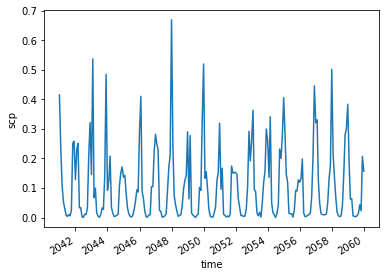

In [32]:

lon1 = 147; lat1 = -38; lon2 = 155; lat2 = -28   
f = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_scp_6hr_daily_max_mean.nc")
f.sel({"lat":slice(lat1, lat2), "lon":slice(lon1,lon2), "time":slice("2041-01-01","2060-01-01")}).mean(("lat","lon"))["scp"].plot()
plt.savefig("/g/data/eg3/ab4502/figs/barpa_2050_monthly_ts.png", bbox_inches="tight")

In [11]:
xr.open_mfdataset(files, concat_dim="time", combine="nested")["wndgust10m"]\
                 .sel({"longitude":slice(lon1, lon2), "latitude":slice(lat1, lat2), "time":slice("1999-12-22 12:00","1999-12-23 12:00")}).time

<xarray.DataArray 'time' (time: 145)>
array(['1999-12-22T12:00:00.000000000', '1999-12-22T12:10:00.000000128',
       '1999-12-22T12:19:59.999999872', '1999-12-22T12:30:00.000000000',
       '1999-12-22T12:40:00.000000128', '1999-12-22T12:49:59.999999872',
       '1999-12-22T13:00:00.000000000', '1999-12-22T13:10:00.000000128',
       '1999-12-22T13:19:59.999999872', '1999-12-22T13:30:00.000000000',
       '1999-12-22T13:40:00.000000128', '1999-12-22T13:49:59.999999872',
       '1999-12-22T14:00:00.000000000', '1999-12-22T14:10:00.000000128',
       '1999-12-22T14:19:59.999999872', '1999-12-22T14:30:00.000000000',
       '1999-12-22T14:40:00.000000128', '1999-12-22T14:49:59.999999872',
       '1999-12-22T15:00:00.000000000', '1999-12-22T15:10:00.000000128',
       '1999-12-22T15:19:59.999999872', '1999-12-22T15:30:00.000000000',
       '1999-12-22T15:40:00.000000128', '1999-12-22T15:49:59.999999872',
       '1999-12-22T16:00:00.000000000', '1999-12-22T16:10:00.000000128',
       '1999-